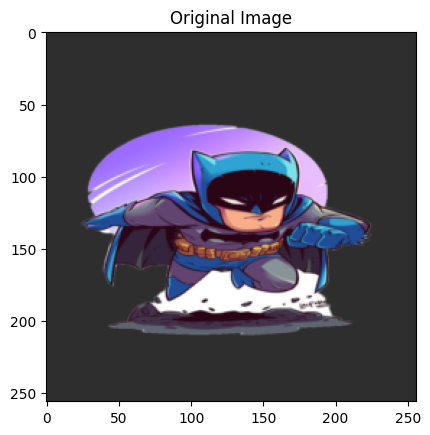

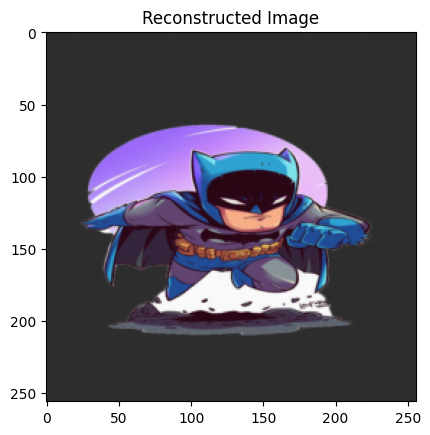

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Define a simple autoencoder with linear layers
class Autoencoder(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 512),  # Encoding layer 1
            nn.ReLU(),
            nn.Linear(512, 256),  # Encoding layer 2
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(256, 512),  # Decoding layer 1
            nn.ReLU(),
            nn.Linear(512, input_size),  # Decoding layer 2
            nn.Sigmoid()  # Output layer with Sigmoid activation for pixel values in [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load a sample color image and resize it to the required input size
image = Image.open("/content/batman.jpg")  # Replace with your image path
input_size = 3 * 256 * 256  # Adjust this size based on your model's input size
transform = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
image = transform(image).view(1, input_size)  # Add a batch dimension and flatten

# Initialize the autoencoder and optimizer
autoencoder = Autoencoder(input_size)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    output = autoencoder(image)
    loss = nn.MSELoss()(output, image)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Display the original and reconstructed images
original_image = image.view(1, 3, 256, 256).squeeze().numpy().transpose(1, 2, 0)
reconstructed_image = output.view(1, 3, 256, 256).squeeze().detach().numpy().transpose(1, 2, 0)

plt.figure()
plt.title("Original Image")
plt.imshow(original_image)
plt.show()

plt.figure()
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image)
plt.show()
